<a href="https://colab.research.google.com/github/mohammadhossein-kr/AI-vs.-AI/blob/main/AI%20vs.%20AI%20-%20GANs%20in%20AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Sine Graph***🤯😬

---



In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(111)

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

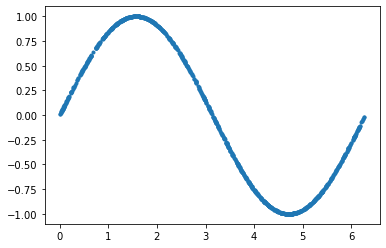

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")


In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output
discriminator = Discriminator()

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [ ]:
learn_rt = 0.001 #0.001 0.0001
num_epochs = 300 #500 300
loss_function = nn.BCELoss()

In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learn_rt)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=learn_rt)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 50 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.21308739483356476
Epoch: 0 Loss G.: 1.7989580631256104
Epoch: 50 Loss D.: 0.6241480708122253
Epoch: 50 Loss G.: 0.7858664393424988
Epoch: 100 Loss D.: 0.6943280100822449
Epoch: 100 Loss G.: 0.6687246561050415
Epoch: 150 Loss D.: 0.7102599740028381
Epoch: 150 Loss G.: 0.7402819991111755
Epoch: 200 Loss D.: 0.6603354215621948
Epoch: 200 Loss G.: 0.8121433854103088
Epoch: 250 Loss D.: 0.6087005138397217
Epoch: 250 Loss G.: 0.9070661067962646


In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

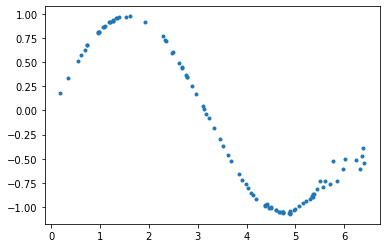

In [ ]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

## ***MNIST***🔮

---



In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms

In [ ]:
torch.manual_seed(111)

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [ ]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

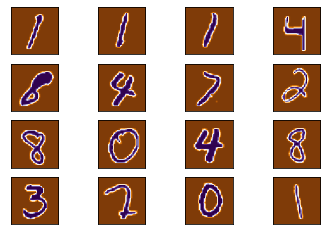

In [ ]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    # plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.imshow(real_samples[i].reshape(28, 28), cmap="PuOr")
    # plt.imshow(real_samples[i].reshape(28, 28), cmap="magma")
    plt.xticks([])
    plt.yticks([])

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output
discriminator = Discriminator()

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output
generator = Generator()

In [ ]:
learn_rt = 0.0001
num_epochs = 40
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learn_rt)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=learn_rt)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 100))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()
        # Show loss
        if n == batch_size - 1:
            loss_d = float(loss_discriminator)
            loss_g = float(loss_generator)
            print(f"Epoch: {epoch}")
            print(f"Loss Discriminator:", loss_d*100, "%")
            print(f"Loss Generator:", loss_g*100, "%")

Epoch: 0
Loss Discriminator: 56.92477226257324 %
Loss Generator: 47.79079854488373 %
Epoch: 1
Loss Discriminator: 6.096680834889412 %
Loss Generator: 383.33747386932373 %
Epoch: 2
Loss Discriminator: 1.1416684836149216 %
Loss Generator: 540.3036594390869 %
Epoch: 3
Loss Discriminator: 4.152332618832588 %
Loss Generator: 513.4734630584717 %
Epoch: 4
Loss Discriminator: 0.6647448055446148 %
Loss Generator: 672.7372169494629 %
Epoch: 5
Loss Discriminator: 8.717642724514008 %
Loss Generator: 458.12854766845703 %
Epoch: 6
Loss Discriminator: 17.70595908164978 %
Loss Generator: 309.75842475891113 %
Epoch: 7
Loss Discriminator: 6.6467322409152985 %
Loss Generator: 317.82543659210205 %
Epoch: 8
Loss Discriminator: 16.090232133865356 %
Loss Generator: 282.78183937072754 %
Epoch: 9
Loss Discriminator: 43.48783791065216 %
Loss Generator: 235.54561138153076 %
Epoch: 10
Loss Discriminator: 33.88947546482086 %
Loss Generator: 191.12112522125244 %
Epoch: 11
Loss Discriminator: 38.758739829063416 %
Lo

In [ ]:
latent_space_samples = torch.randn(batch_size, 100)
generated_samples = generator(latent_space_samples)

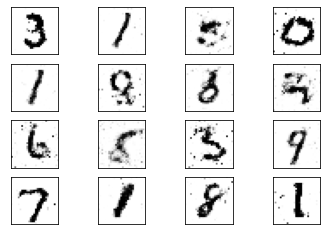

In [ ]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

## ***Persian NUM***

---



In [ ]:
# Python 3.6.0
# tensorflow 1.1.0

import os
import os.path as path

import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib
# import tensorflow.examples.tutorials.mnist.input_data as input_data
from tensorflow.examples.tutorials.mnist import input_data

MODEL_NAME = 'mnist_convnet'
NUM_STEPS = 3000
BATCH_SIZE = 16

def model_input(input_node_name, keep_prob_node_name):
    x = tf.placeholder(tf.float32, shape=[None, 28*28], name=input_node_name)
    keep_prob = tf.placeholder(tf.float32, name=keep_prob_node_name)
    y_ = tf.placeholder(tf.float32, shape=[None, 10])
    return x, keep_prob, y_

def build_model(x, keep_prob, y_, output_node_name):
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    # 28*28*1

    conv1 = tf.layers.conv2d(x_image, 64, 3, 1, 'same', activation=tf.nn.relu)
    # 28*28*64
    pool1 = tf.layers.max_pooling2d(conv1, 2, 2, 'same')
    # 14*14*64

    conv2 = tf.layers.conv2d(pool1, 128, 3, 1, 'same', activation=tf.nn.relu)
    # 14*14*128
    pool2 = tf.layers.max_pooling2d(conv2, 2, 2, 'same')
    # 7*7*128

    conv3 = tf.layers.conv2d(pool2, 256, 3, 1, 'same', activation=tf.nn.relu)
    # 7*7*256
    pool3 = tf.layers.max_pooling2d(conv3, 2, 2, 'same')
    # 4*4*256

    flatten = tf.reshape(pool3, [-1, 4*4*256])
    fc = tf.layers.dense(flatten, 1024, activation=tf.nn.relu)
    dropout = tf.nn.dropout(fc, keep_prob)
    logits = tf.layers.dense(dropout, 10)
    outputs = tf.nn.softmax(logits, name=output_node_name)

    # loss
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits))

    # train step
    train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)

    # accuracy
    correct_prediction = tf.equal(tf.argmax(outputs, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    tf.summary.scalar("loss", loss)
    tf.summary.scalar("accuracy", accuracy)
    merged_summary_op = tf.summary.merge_all()

    return train_step, loss, accuracy, merged_summary_op

def train(x, keep_prob, y_, train_step, loss, accuracy,
        merged_summary_op, saver):
    print("training start...")

    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

    init_op = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init_op)

        tf.train.write_graph(sess.graph_def, 'out',
            MODEL_NAME + '.pbtxt', True)

        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter('logs/',
            graph=tf.get_default_graph())

        for step in range(NUM_STEPS):
            batch = mnist.train.next_batch(BATCH_SIZE)
            if step % 100 == 0:
                train_accuracy = accuracy.eval(feed_dict={
                    x: batch[0], y_: batch[1], keep_prob: 1.0})
                print('step %d, training accuracy %f' % (step, train_accuracy))
            _, summary = sess.run([train_step, merged_summary_op],
                feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
            summary_writer.add_summary(summary, step)

        saver.save(sess, 'out/' + MODEL_NAME + '.chkp')

        test_accuracy = accuracy.eval(feed_dict={x: mnist.test.images,
                                    y_: mnist.test.labels,
                                    keep_prob: 1.0})
        print('test accuracy %g' % test_accuracy)

    print("training finished!")

def export_model(input_node_names, output_node_name):
    freeze_graph.freeze_graph('out/' + MODEL_NAME + '.pbtxt', None, False,
        'out/' + MODEL_NAME + '.chkp', output_node_name, "save/restore_all",
        "save/Const:0", 'out/frozen_' + MODEL_NAME + '.pb', True, "")

    input_graph_def = tf.GraphDef()
    with tf.gfile.Open('out/frozen_' + MODEL_NAME + '.pb', "rb") as f:
        input_graph_def.ParseFromString(f.read())

    output_graph_def = optimize_for_inference_lib.optimize_for_inference(
            input_graph_def, input_node_names, [output_node_name],
            tf.float32.as_datatype_enum)

    with tf.gfile.FastGFile('out/opt_' + MODEL_NAME + '.pb', "wb") as f:
        f.write(output_graph_def.SerializeToString())

    print("graph saved!")

def main():
    if not path.exists('out'):
        os.mkdir('out')

    input_node_name = 'input'
    keep_prob_node_name = 'keep_prob'
    output_node_name = 'output'

    x, keep_prob, y_ = model_input(input_node_name, keep_prob_node_name)

    train_step, loss, accuracy, merged_summary_op = build_model(x, keep_prob,
        y_, output_node_name)
    saver = tf.train.Saver()

    train(x, keep_prob, y_, train_step, loss, accuracy,
        merged_summary_op, saver)

    export_model([input_node_name, keep_prob_node_name], output_node_name)

if __name__ == '__main__':
    main()

ModuleNotFoundError: ignored